# 04 Numbers and Errors 

* *Computational Physics*: Ch 2.4, 2.5, 3
* Python Tutorial [Floating Point Arithmetic: Issues and Limitations](https://docs.python.org/3/tutorial/floatingpoint.html)

## Binary representation
Computers store information with two-state logic. This can be represented in a binary system with numbers 0 and 1 (i.e. base 2)

Any number can be represented in any base as a polynomial (possibly with infinitely many terms): the digits are $0 \leq x_k < b$ and determine the contribution of the base $b$ raise to the $k$th power.

$$
q_b = \sum_{k=-\infty}^{+\infty} x_k b^k
$$

### Integers 

Convert 10 (base 10, i.e. $1 \times 10^1 + 0\times 10^0$) into binary (Note: `divmod(x, 2)` is `x // 2, x % 2`, i.e. integer division and remainder):

In [52]:
divmod(10, 2)

(5, 0)

In [53]:
divmod(5, 2)

(2, 1)

In [54]:
divmod(2, 2)

(1, 0)

The binary representation of $10_{10}$ is $1010_2$ (keep dividing until there's only 1 left, then collect the 1 and all remainders in reverse order, essentially long division).

Double check:

In [55]:
1*2**3 + 0*2**2 + 1*2**1 + 0*2**0

10

In [56]:
int('0b1010', 2)

10

In [57]:
0b1010

10

**All integers are exactly representable in base 2 with a finite number of digits**.

The sign (+ or –) is represented by a single bit (0 = +, 1 = –). 

The number of available "bits" (digits) determines the largest representable integer. 

For example, with 8 bits available (a "*byte*"), what is the largest and smallest integer?

In [59]:
0b1111111  # 7 bits for number, 1 for sign (not included)

127

In [61]:
-0b1111111

-127

If you want to properly sum all terms, use numpy arrays and the element-wise operations:

In [62]:
import numpy as np

In [74]:
nbits = 7
exponents = np.arange(nbits)
bases = 2*np.ones(nbits)  # base 2
digits = np.ones(nbits)   # all 1

In [76]:
np.sum(digits * bases**exponents)

127.0

#### Breakout: limits of integers

What is the smallest and largest integer that you can represent

1. if you have 4 bits available and only consider non-negative ("unsigned") integers?
2. if you have 32 bits and consider positive and negative integers?
3. BONUS: if you have 64 bits and consider positive and negative integers?

In [77]:
0b1111

15

In [80]:
max32 = int("0b"+"1"*(32-1), 2)
min32 = - max32
print(min32, max32)

-2147483647 2147483647


Or even simpler: The highest power in the above expression is $2^30$ (=1000000...0). The highest number will be the next highest power minus 1:

In [116]:
2**31 - 1

2147483647

In [120]:
max64 = 2**(64-1) - 1
print(-max64, max64)

-9223372036854775807 9223372036854775807


#### Python's arbitrary precision integers 

In Python, integers *have arbitrary precision*: integer arithmetic (`+`, `-`, `*`, `//`) is exact and will not overflow. Thus the following code will run forever (until memory is exhausted); if you run it, you can stop the evaluation with the ''Kernel / Interrupt'' menu command in the notebook and then investigate `n` and `nbits`:

In [95]:
n = 1 
nbits = 0
while True:
    n *= 2
    nbits += 1

KeyboardInterrupt: 

In [98]:
type(n)

int

In [104]:
int.bit_length(n)

630912

In [105]:
nbits

630911

#### NumPy has fixed precision integers
NumPy data types (dtypes) are fixed precision. Overflows "wrap around":

In [121]:
import numpy as np

In [112]:
np.array([2**15-1], dtype=np.int16)

array([32767], dtype=int16)

In [122]:
np.array([2**15], dtype=np.int16)

array([-32768], dtype=int16)

In [123]:
np.array([2**15 + 1], dtype=np.int16)

array([-32767], dtype=int16)

### Binary fractions
Decimal fractions can be represented as binary fractions, known as **floating point numbers**.

Convert $0.125_{10}$ to base 2:

In [87]:
0.125 * 2  # 0.0

0.25

In [88]:
_ * 2      # 0.00

0.5

In [89]:
_ * 2      # 0.001

1.0

Thus the binary representation of 0.125 is $0.001$:

- multiply by 2
- if you get a number < 1, add a digit 0 to the right
- if you get a number ≥ 1, add a digit 1 to the right and then use the remainder in the same fashion

In [91]:
0.3125 * 2    # 0.0

0.625

In [92]:
_ * 2         # 0.01

1.25

In [93]:
(_ - 1) * 2   # 0.010

0.5

In [94]:
_ * 2         # 0.0101

1.0

Thus, 0.3125 is $0.0101_2$.

What is the binary representation of decimal $0.1 = \frac{1}{10}$?

In [124]:
0.1 * 2  # 0

0.2

In [125]:
_ * 2   # 0

0.4

In [126]:
_ * 2  # 0

0.8

In [127]:
_ * 2  # 1

1.6

In [128]:
(_ - 1) * 2  # 1

1.2000000000000002

In [129]:
(_ - 1) * 2  # 0

0.40000000000000036

In [130]:
_ * 2  # 0 

0.8000000000000007

In [131]:
_ * 2  # 1 

1.6000000000000014

... etc: this is an infinitely repeating fraction and the binary representation of $0.1_{10}$ is $0.000 1100 1100 1100 ..._2$.

**Thus, with a finite number of bits, 0.1 is not exactly representable in the computer.**

The number 0.1 is not stored exactly in the computer. `print` only shows you a convenient approximation:


In [132]:
print(0.1)

0.1


In [143]:
print("{0:.55f}".format(0.1))

0.1000000000000000055511151231257827021181583404541015625


This leads to some problems with floating point aritmetic:

In [144]:
0.1 + 0.1 + 0.1 == 0.3

False

... which should have yielded `True`! But because the machine representation of 0.1 is not exact, the equality cannot be fulfilled.

## Representation of floats: IEEE 754

Floating point numbers are stored in "scientific notation": e.g. $c = 2.88792458 \times 10^8$ m/s
  * **mantissa**: $2.88792458$
  * **exponent**: $+8$
  * **sign**: +

Format: 
$$
x = (-1)^s \times 1.f \times 2^{e - \mathrm{bias}}
$$

### IEEE float (32 bit)

IEEE *float* uses **32 bits**
  * $\mathrm{bias} = 127_{10}$
  * bits
    <table>
    <tr><td></td><td>s</td><td>e</td><td>f</td></tr>
    <tr><td>bit position</td><td>31</td><td>30–23</td><td>22–0</td></tr>
    </table>
  * **six or seven decimal places of significance** (1 in $2^{23}$)
  * range: $1.4 \times 10^{-45} \leq |x_{(32)}| \leq 3.4 \times 10^{38}$ 

In [149]:
1/2**23

1.1920928955078125e-07

### IEEE double (64 bit)
Python floating point numbers are 64-bit doubles. NumPy has dtypes `float32` and `float64`.


IEEE *double* uses **64 bits**
  * $\mathrm{bias} = 1023_{10}$
  * bits
    <table>
    <tr><td></td><td>s</td><td>e</td><td>f</td></tr>
    <tr><td>bit position</td><td>63</td><td>62–52</td><td>51–0</td></tr>
    </table>
  * **about 16 decimal places of significance** (1 in $2^{52}$)
  * range: $4.9 \times 10^{-324} \leq |x_{(64)}| \leq 1.8 \times 10^{308}$ 


In [150]:
1/2**52

2.220446049250313e-16

For numerical calculations, *doubles* are typically required.

### Special numbers
IEEE 754 also introduces special "numbers" that can result from floating point arithmetic
* `NaN` (not a number)
* `+INF` and `-INF` (infinity)
* `-0` (signed zero)

Python itself does not use the IEEE special numbers

In [151]:
1/0

ZeroDivisionError: division by zero

But numpy does:

In [153]:
np.array([1, -1])/np.zeros(2)

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


array([ inf, -inf])

But beware, you cannot use `INF` to "take limits". It is purely a sign that something bad happened somewhere...

In [155]:
np.zeros(2)/np.zeros(2)

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


array([ nan,  nan])

### Overflow and underflow

* underflow: typically just set to zero (and that works well most of the time)
* overflow: raises exception or just set to `inf`

In [165]:
big = 1.79e308
big

1.79e+308

In [166]:
2 * big

inf

In [168]:
2 * np.array([big], dtype=np.float64)

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: overflow encountered in multiply
  if __name__ == '__main__':


array([ inf])

... but you can just use an even bigger data type:

In [169]:
2 * np.array([big], dtype=np.float128)

array([ 3.58e+308], dtype=float128)

### Insignificant digits

In [78]:
x = 1000.2
A = 1000.2 - 1000.0
print(A)

0.20000000000004547


In [76]:
A == 0.2

False

... oops

In [82]:
x = 700
y = 1e-14
x - y

700.0

In [83]:
x - y < 700

False

... o

## Machine precision
Only a limited number of floating point numbers can be represented. This *limited precision* affects calculations:


In [172]:
x = 5  + 1e-16
x

5.0

In [173]:
x == 5

True

... oops.

**Machine precision** $\epsilon_m$ is defined as the maximum number that can be added to 1 in the computer without changing that number 1:
$$
1_c + \epsilon_m := 1_c
$$

Thus, the *floating point representation* $x_c$ of an arbitrary number $x$ is "in the vicinity of $x$"
$$
x_c = x(1\pm\epsilon), \quad |\epsilon| \leq \epsilon_m
$$
where we don't know the true value of $\epsilon$.

Thus except for powers of 2 (which are represented exactly) **all floating point numbers contain an unknown error in the 6th decimal place (32 bit floats) or 15th decimal (64 bit doubles)**. 

This error should be treated as a random error because we don't know its magnitude.

In [195]:
N = 100
eps = 1
for nbits in range(N):
    eps /= 2
    one_plus_eps = 1.0 + eps
    # print("eps = {0}, 1 + eps = {1}".format(eps, one_plus_eps))
    if one_plus_eps == 1.0:
        print("machine precision reached for {0} bits".format(nbits))
        print("eps = {0}, 1 + eps = {1}".format(eps, one_plus_eps))
        break


machine precision reached for 52 bits
eps = 1.1102230246251565e-16, 1 + eps = 1.0


In [193]:
1/2**52

2.220446049250313e-16

## Problem: Summing Series: sin(x)

Evaluate the $\sin$ function from its series representation
$$
\sin x = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \dots
$$

A naive algorithm is to sum the series up to the $N$th term:
$$
\sin x \approx \sum_{n=1}^N \frac{(-1)^{n-1} x^{2n-1}}{(2n - 1)!}
$$

Problems:

- How to decide when to stop summing?
- Division of large terms (overflows!)
- Powers and factorials are very expensive to compute.

Better approach: Build up series terms $a_n$ using previous term $a_{n-1}$ through a recursion:

\begin{align}
a_n &= a_{n-1} \times q_n\\
a_n &= \frac{(-1)^{n-1} x^{2n-1}}{(2n - 1)!} = \frac{(-1)^{n-2} x^{2n-3}}{(2n - 3)!} \frac{-x^2}{(2n - 1)(2n - 2)}\\
a_n & = a_{n-1} \frac{-x^2}{(2n - 1)(2n - 2)}
\end{align}

Accuracy of this approach? Not clear in absolute terms but we can make the assumption that the error is approximately the last term in the sum, $a_N$. Hence we can strive to make the relative error smaller than the machine precision
$$
\left| \frac{a_N}{\sum_{n=1}^N a_n} \right| < \epsilon_m
$$



In [33]:
def sin_series(x, eps=1e-16):
    """Calculate sin(x) to precision eps"""
    if x == 0:
        return 0., 1
    a_n = sumN = x   # a_1 is the sum
    n = 2            # start with calculating a_2
    while abs(a_n/sumN) > eps:
        a_n *= -x*x/((2*n - 1)*(2*n - 2)) 
        sumN += a_n
        n += 1
    return sumN, n-1

Test the implementation against the "exact" numpy function `np.sin()`.

Report
1. `x`
2. maximum `n`
3. `sin_series(x)`
4. relative error `abs(sin_series(x) - sin(x))/abs(sin(x))`

Plot against `x` the quantities above and also `sin(x)`.
* `x` - `sin_series(x)`
* `x` - `sin(x)`
* `x` - max `n`
* `x` - relative error (semilogy plot!)

For a range of numbers look at `Xsmall` and `Xlarge`:

In [67]:
Xsmall = np.pi*np.arange(-2, 2.05, 0.05)
Xlarge = np.pi*np.arange(-50, 50.05, 0.1)

Implementation:

In [34]:
import numpy as np
def test_sin(x):
    y, nmax = sin_series(x)
    y0 = np.sin(x)
    delta = y - y0
    if y0 != 0:
        relative_error = delta/y0
    else:
        relative_error = 0
    # print(x, y, y0, delta, relative_error)
    #return x, y, y0, delta, relative_error
    return x, nmax, y, relative_error 

In [68]:
results = np.array([test_sin(x) for x in Xsmall])

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

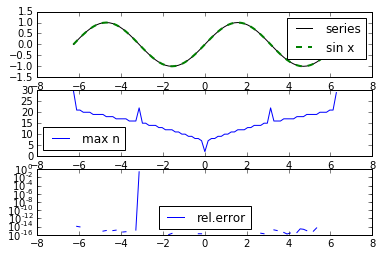

In [71]:
ax1 = plt.subplot(3,1,1)
ax1.plot(results[:, 0], results[:, 2], 'k-', lw=1, label="series")
ax1.plot(results[:, 0], np.sin(results[:, 0]), 'g--', lw=2, label="sin x")
ax1.legend(loc="best")

ax2 = plt.subplot(3,1,2)
ax2.plot(results[:, 0], results[:, 1], label="max n")
ax2.legend(loc="best")

ax3 = plt.subplot(3,1,3)
ax3.semilogy(results[:, 0], results[:, 3], label="rel.error")
ax3.legend(loc="best")

In [72]:
def test_plot_sine(X, filename="sine_error.pdf"):
    results = np.array([test_sin(x) for x in X])
    
    fig = plt.figure(figsize=(8, 10))
    
    ax1 = fig.add_subplot(3,1,1)
    ax1.plot(results[:, 0], results[:, 2], 'k-', lw=1, label="series")
    ax1.plot(results[:, 0], np.sin(results[:, 0]), 'g--', lw=2, label="sin x")
    ax1.legend(loc="best")

    ax2 = fig.add_subplot(3,1,2)
    ax2.plot(results[:, 0], results[:, 1], label="max n")
    ax2.legend(loc="best")

    ax3 = fig.add_subplot(3,1,3)
    ax3.semilogy(results[:, 0], results[:, 3], label="rel.error")
    ax3.legend(loc="best")
    
    fig.suptitle("sine series approximation")
    
    fig.savefig(filename)
    print("saved to file {0}".format(filename))

saved to file sine_error_Xsmall.pdf


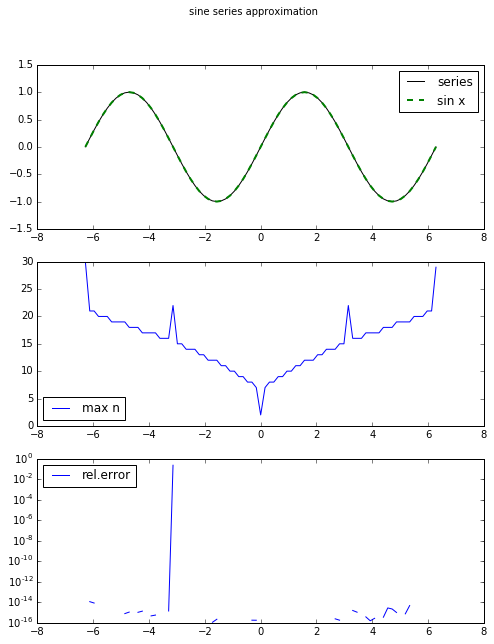

In [73]:
test_plot_sine(Xsmall, filename="sine_error_Xsmall.pdf")

saved to file sine_error_Xlarge.pdf


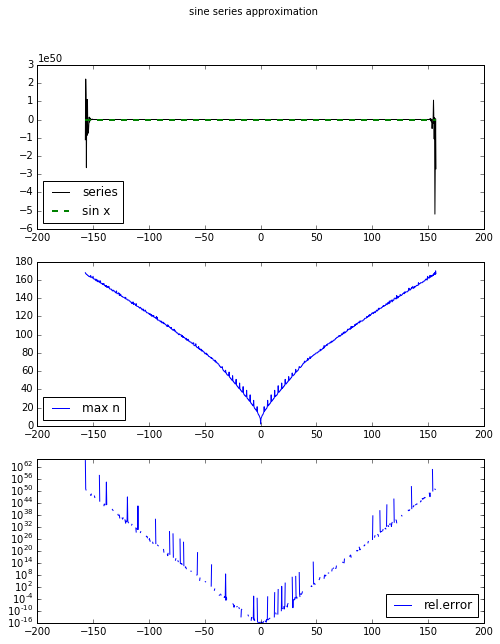

In [74]:
test_plot_sine(Xlarge, filename="sine_error_Xlarge.pdf")

#### More exploration 

saved to file sine_error.pdf


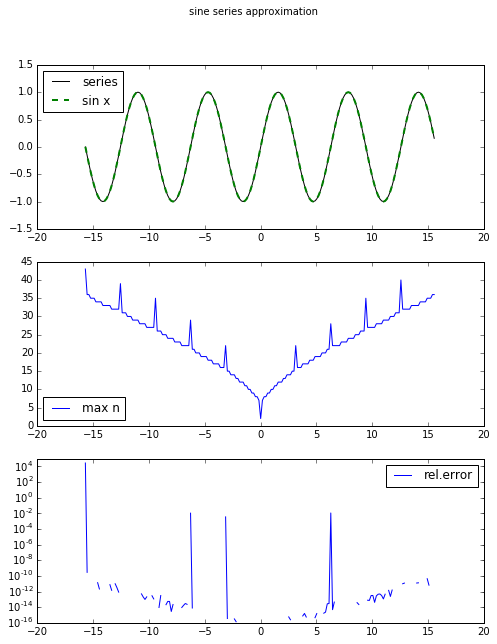

In [63]:
test_plot_sine(np.pi*np.arange(-5, 5, 0.05))

saved to file sine_error.pdf


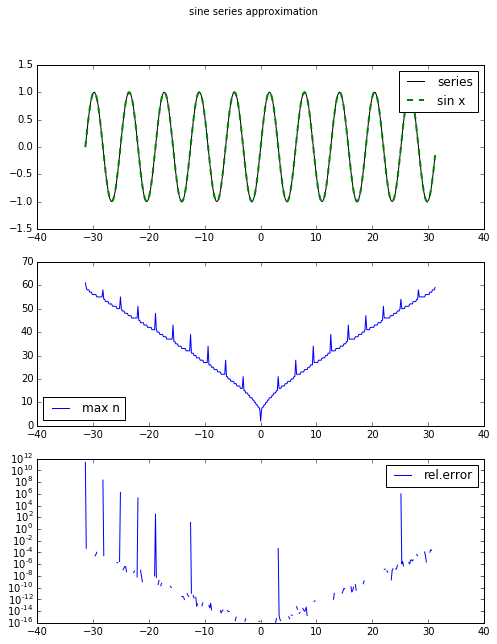

In [64]:
test_plot_sine(np.pi*np.arange(-10, 10, 0.05))

saved to file sine_error.pdf


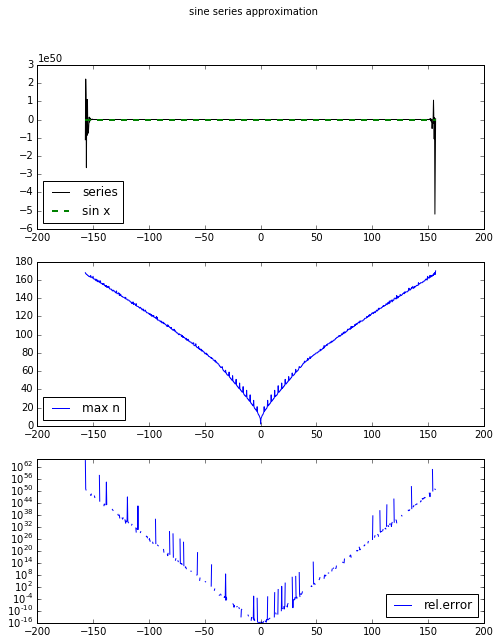

In [66]:
test_plot_sine(np.pi*np.arange(-50, 50, 0.1))

## Appendix

A quick hack to convert a floating point binary representation to a floating point number.

In [16]:
bits = "1010.0001100110011001100110011001100110011001100110011"

In [33]:
import math
def bits2number(bits):
    if '.' in bits:
        integer, fraction = bits.split('.')
    else:
        integer = bits
        fraction = ""
    powers = [int(bit) * 2**n for n, bit in enumerate(reversed(integer))]
    powers.extend([int(bit) * 2**(-n) for n, bit in enumerate(fraction, start=1)])
    return math.fsum(powers)

In [34]:
bits2number(bits)

10.1

In [35]:
bits2number('1111')

15.0

In [36]:
bits2number('0.0001100110011001100110011001100110011001100110011')

0.09999999999999964

In [37]:
bits2number('0.0001100')

0.09375

In [90]:
bits2number('0.0101')

0.3125